## 1. Cargar datos reales

Se utilizará el set de datos 'publicidad_ventas_ejemplo.csv', que contiene el gasto en publicidad y las ventas obtenidas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_csv('publicidad_ventas_ejemplo.csv')

X = df['Publicidad'].values
y = df['Ventas'].values


## 2. Regresión lineal por mínimos cuadrados (scikit-learn)

In [2]:
X_2d = X.reshape(-1, 1)              # Convertimos X a un arreglo 2D, necesario para scikit-learn
model = LinearRegression()           # Creamos una instancia del modelo de regresión lineal
model.fit(X_2d, y)                   # Ajustamos el modelo a los datos (X_2d, y)
y_pred_sklearn = model.predict(X_2d) # Predecimos los valores de y usando el modelo entrenado

# Obtenemos el coeficiente (pendiente) y la intersección (ordenada al origen)
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_

# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R^2)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
r2_sklearn = r2_score(y, y_pred_sklearn)

# Mostramos los resultados
print(f'Regresión scikit-learn: m = {m_sklearn:.4f}, b = {b_sklearn:.4f}')
print(f'MSE: {mse_sklearn:.2f}, R^2: {r2_sklearn:.4f}')

Regresión scikit-learn: m = 2.2584, b = 3.3298
MSE: 0.07, R^2: 0.9978


## 3. Regresión lineal por descenso de gradiente manual

El algoritmo de descenso de gradiente es un método numérico para **encontrar los valores de los parámetros que minimizan una función de costo**.

En regresión lineal:

- Tienes una función de costo $J(\theta)$ (por ejemplo, el MSE).
- Calculas el **gradiente** $\nabla J(\theta)$, que indica hacia dónde crece más rápido el error.
- En cada iteración actualizas los parámetros en la **dirección opuesta** al gradiente:

$$
\theta_{\text{nuevo}} = \theta_{\text{actual}} - \alpha \, \nabla J(\theta_{\text{actual}})
$$

donde $\alpha$ es el *learning rate*.

Repitiendo este proceso muchas veces, los parámetros se van moviendo hacia el mínimo de la función de costo, es decir, hacia el **mejor ajuste posible del modelo a los datos**.

In [3]:
# Inicializar parámetros
m_gd = 0
b_gd = 0
learning_rate = 0.01
epochs = 1000
n = len(X)
losses = []
for epoch in range(epochs):
    y_pred_gd = m_gd * X + b_gd
    loss = mean_squared_error(y, y_pred_gd)
    losses.append(loss)
    D_m = (-2/n) * sum(X * (y - y_pred_gd))
    D_b = (-2/n) * sum(y - y_pred_gd)
    m_gd = m_gd - learning_rate * D_m
    b_gd = b_gd - learning_rate * D_b
y_pred_gd = m_gd * X + b_gd
mse_gd = mean_squared_error(y, y_pred_gd)
r2_gd = r2_score(y, y_pred_gd)
print(f'Descenso de gradiente: m = {m_gd:.4f}, b = {b_gd:.4f}')
print(f'MSE: {mse_gd:.2f}, R^2: {r2_gd:.4f}')

Descenso de gradiente: m = 2.2686, b = 3.2648
MSE: 0.07, R^2: 0.9978


## 4. Comparación visual de ambos métodos

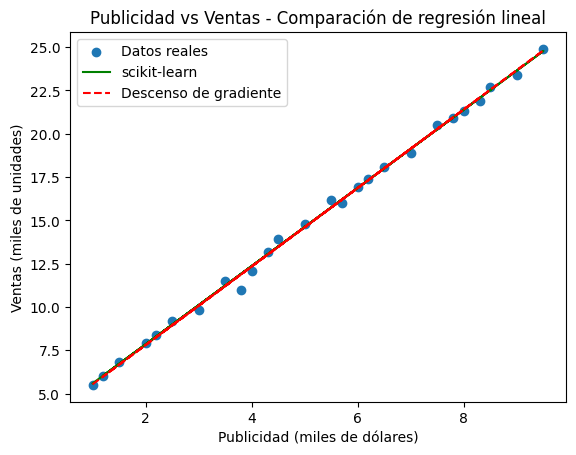

In [4]:
plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred_sklearn, color='green', label='scikit-learn')
plt.plot(X, y_pred_gd, color='red', linestyle='--', label='Descenso de gradiente')
plt.xlabel('Publicidad (miles de dólares)')
plt.ylabel('Ventas (miles de unidades)')
plt.title('Publicidad vs Ventas - Comparación de regresión lineal')
plt.legend()
plt.show()

## 5.Visualización de perdida (loss) por epoch en descenso de gradiente

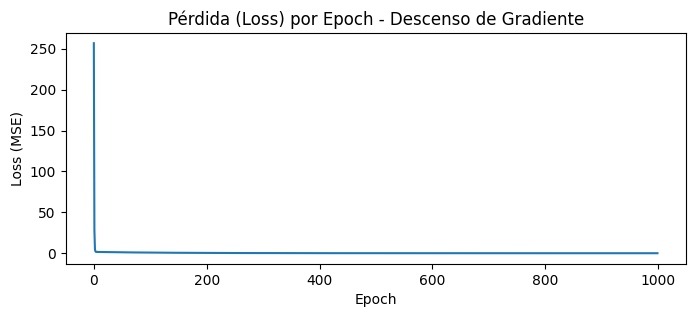

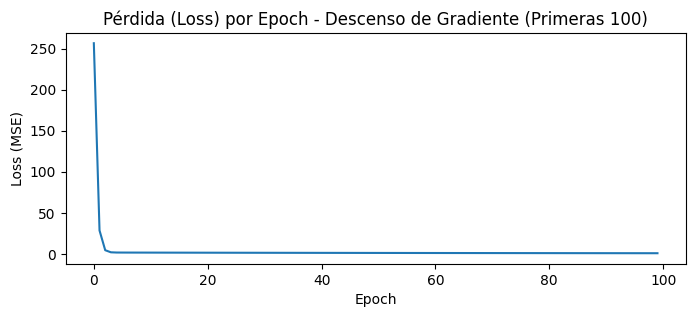

In [5]:
# Visualización de la pérdida (loss) por epoch en descenso de gradiente
m_gd = 0
b_gd = 0
learning_rate = 0.01
epochs = 1000
n = len(X)
losses = []
for epoch in range(epochs):
    y_pred_gd = m_gd * X + b_gd
    loss = mean_squared_error(y, y_pred_gd)
    losses.append(loss)
    D_m = (-2/n) * sum(X * (y - y_pred_gd))
    D_b = (-2/n) * sum(y - y_pred_gd)
    m_gd = m_gd - learning_rate * D_m
    b_gd = b_gd - learning_rate * D_b
plt.figure(figsize=(8,3))
plt.plot(losses)
plt.title('Pérdida (Loss) por Epoch - Descenso de Gradiente')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.show()


plt.figure(figsize=(8,3))
plt.plot(losses[:100])
plt.title('Pérdida (Loss) por Epoch - Descenso de Gradiente (Primeras 100)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.show()

"caída" abrupta al inicio.  
Esto ocurre porque el descenso de gradiente reduce el error muy rápido en las primeras iteraciones, acercándose rápidamente al mínimo. Después de eso, la pérdida (MSE) se estabiliza y cambia muy poco, por lo que la curva parece plana.

**¿Por qué no se ve un descenso gradual?**
- El descenso de gradiente suele tener una caída brusca al principio si los parámetros iniciales están lejos del óptimo.
- Cuando el modelo se acerca al mínimo, los cambios en la pérdida son pequeños y la curva se aplana.

**¿Cómo mejorar la visualización?**
- Puedes limitar el eje Y para ver mejor los detalles de las últimas épocas.
- También puedes graficar solo las primeras 100 épocas para ver el descenso inicial.

## 5. Conclusión
Ambos métodos logran ajustar una recta similar a los datos. El método analítico (scikit-learn) es más eficiente y preciso, mientras que el descenso de gradiente puede ser útil para grandes volúmenes de datos o cuando se requiere optimización iterativa. Las métricas MSE y R² permiten comparar el desempeño de ambos enfoques.

## 6. Validación cruzada del modelo de regresión lineal

En esta sección aplicamos validación cruzada al modelo de regresión lineal de scikit-learn para evaluar la estabilidad de su desempeño. Usaremos K-Fold con métrica R² como indicador de ajuste.


In [ ]:
# Validación cruzada con K-Fold para el modelo de scikit-learn
from sklearn.model_selection import cross_val_score, KFold

# Usamos las mismas variables X_2d (publicidad) e y (ventas)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores_r2 = cross_val_score(LinearRegression(), X_2d, y, cv=kfold, scoring='r2')

print("Scores R^2 por fold:", scores_r2) 
print(f"R^2 promedio: {scores_r2.mean():.4f}")
print(f"Desviación estándar de R^2: {scores_r2.std():.4f}")


Scores R^2 por fold: [0.9978703  0.99795832 0.9985367  0.99977626 0.98308898]
R^2 promedio: 0.9954
Desviación estándar de R^2: 0.0062
